In [2]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#train = pd.read_csv('/content/drive/MyDrive/Datasets/Data/train_age_dataset.csv')
train = pd.read_csv("./Data/train_age_dataset.csv")
len(train)

488877

In [5]:
test = pd.read_csv("./Data/test_age_dataset.csv")
len(test)

54320

In [6]:
sample = pd.read_csv("./Data/sample_submission.csv")
sample.head()

,prediction
0,1
1,1
2,1
3,1
4,1


## Cleaning

In [7]:
train.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [8]:
test.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
dtype: int64

# WHY ARE THERE NO NULL VALUES

In [9]:
train.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


Oh looks like the null values have been filled with zeros

In [10]:
unnamed = train['Unnamed: 0'].value_counts()
unnamed.value_counts()

1    488877
Name: Unnamed: 0, dtype: int64

Dropping this column, it's redundant

Checking the zero null thing

In [11]:
traintest = pd.concat([train, test])
traintest

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000,1.0
1,405231,51100441,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500,2.0
2,57867,6887426,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000,1.0
3,272618,50742404,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000,1.0
4,251123,45589200,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54315,301257,56503645,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.523364,0.000000,0.000000,0.108411,0.000000,0.000000,0.140187,0.401869,0.000,NaN
54316,39167,39840927,1,1,0.177419,1.666667,2.210526,0,0.0,0.0,...,0.435484,0.000000,0.072581,0.058065,0.000000,0.040323,0.104839,0.290323,140.325,NaN
54317,471826,68398375,2,1,0.048387,0.000000,0.000000,3,0.0,0.0,...,0.935484,0.048387,0.209677,0.158065,0.000000,0.435484,0.048387,0.725806,186.000,NaN
54318,13839,51709440,1,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.177966,0.000000,0.088983,0.000000,0.000000,0.000000,0.000000,0.177966,0.000,NaN


In [12]:
#traintest['followers_actual_avg'] = 30*traintest['followers_avg_age'] - 20
#traintest['following_actual_avg'] = 30*traintest['following_avg_age'] - 20

In [134]:
traintest.groupby(['avgDuration']).size()

avgDuration
0.233000       1
0.588000       1
0.660000       1
0.767000       4
0.954000       1
              ..
2408.570590    1
2545.164333    1
3147.007000    1
3964.011000    1
7541.026000    1
Length: 459922, dtype: int64

# TODO avgDuration, avgComments, creations, content_views, num_of_comments, weekend, weekday. Others inspected

array([[<AxesSubplot:title={'center':'avgDuration'}>]], dtype=object)

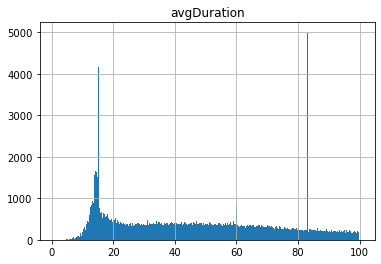

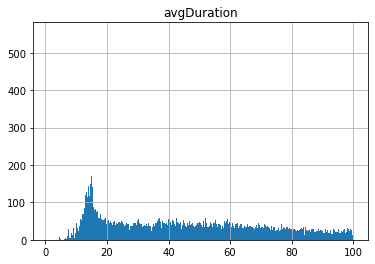

In [138]:
from sklearn.preprocessing import StandardScaler

avgDuration_bin_edges = [0.1*i for i in range(10,1000,1)]
train.hist(column='avgDuration', bins = avgDuration_bin_edges)
test.hist(column='avgDuration', bins = avgDuration_bin_edges)

In [13]:
traintest['rep_punc_log'] = np.log(traintest['max_repetitive_punc']+0.000000001)
traintest['hpa_log'] = np.log(traintest['num_of_hashtags_per_action']+0.000000001)
scaler = StandardScaler()
scaler.fit(np.array(traintest['avgt2']).reshape(-1,1))
traintest['avgt2_log'] = np.log(np.array(traintest['avgt2']).reshape(-1,1)) 
traintest['ppa_binned'] = np.min(np.ceil(traintest['punctuations_per_action']),6)
traintest['ppa_log'] = np.log(traintest['num_of_hashtags_per_action']+0.000000001)
wpa_bins = [0,0.0000001,1,2,3,4,5,7,10,50,1000]
wpa_labels = [0,1,2,3,4,5,6,7,8,9]
traintest['wpa_binned'] =  pd.cut(df['percentage'], bins=wpa_bins, labels=wpa_labels)
traintest['wpa_log'] = np.log(traintest['num_of_hashtags_per_action']+0.000000001)
traintest['epa_log'] = np.log(traintest['emoji_count_per_action']+0.000000001)
traintest['emoji_total'] = traintest['emoji_count_per_action']*traintest['num_of_comments']
traintest['words_total'] = traintest['number_of_words_per_action']*traintest['num_of_comments']
traintest['punc_total'] = traintest['punctuations_per_action']*traintest['num_of_comments']
traintest['avgCompletion_log'] = np.log(traintest['avgCompletion']+0.000000001)
traintest['avgTimeSpent_log'] = np.log(traintest['avgTimeSpent']+0.000000001)
traintest['avgCompletion_log'] = np.log(traintest['avgCompletion']+0.000000001)

In [16]:
traintest.groupby(['num_of_hashtags_per_action']).size()

num_of_hashtags_per_action
0.000000    541965
0.000119         1
0.000238         1
0.000688         1
0.000920         1
             ...  
1.500000         2
1.666667         1
1.800000         1
2.000000         2
2.333333         3
Length: 444, dtype: int64

In [17]:
traintest.groupby(['num_of_comments']).size()

num_of_comments
0.000000    494006
0.000631         1
0.000639         1
0.000660         1
0.000664         1
             ...  
4.344549         1
4.516279         1
4.575000         1
5.296000         1
8.196850         1
Length: 4089, dtype: int64

In [18]:
traintest['num_hash'] = traintest['num_of_hashtags_per_action']*traintest['num_of_comments']
traintest.groupby(['num_hash']).size()

num_hash
0.000000    542892
0.000001         1
0.000006         1
0.000007         1
0.000013         1
             ...  
0.004571         1
0.005026         1
0.005028         1
0.006053         1
0.015340         1
Length: 303, dtype: int64

In [21]:
traintest['num_hash_rescaled'] = np.round(traintest['num_hash']/0.000001)
traintest.groupby(['num_hash_rescaled']).size()

num_hash_rescaled
0.0        542892
1.0             1
6.0             1
7.0             1
13.0            1
            ...  
4571.0          1
5026.0          1
5028.0          1
6053.0          1
15340.0         1
Length: 249, dtype: int64

In [23]:
def hash_bins(val):
  if val == 0:
    return -1
  elif val<500:
    return 1
  elif val<1500:
    return 2
  else:
    return 3

traintest['hash_binned'] = traintest['num_hash_rescaled'].apply(lambda x: hash_bins(x))
traintest.groupby(['hash_binned']).size()

hash_binned
-1    542892
 1       222
 2        59
 3        24
dtype: int64

In [24]:
traintest.groupby(['following_rate']).size()

following_rate
0.000000      345156
0.000686           1
0.000689           1
0.000704           1
0.000772           2
               ...  
426.504000         1
488.362205         1
563.631147         1
685.277778         1
895.304000         1
Length: 16377, dtype: int64

In [25]:
traintest['Majority Followers'] = np.round(traintest['followers_avg_age'])
traintest['Majority Following'] = np.round(traintest['following_avg_age'])

In [26]:
traintest.groupby(['content_views']).size()

content_views
0.000873     1
0.000883     1
0.000887     1
0.000895     1
0.000909     1
            ..
35.801587    1
37.206349    1
39.966387    1
39.991935    1
75.662281    1
Length: 33941, dtype: int64

In [27]:
bins = pd.IntervalIndex.from_tuples([(0, 0.01), (0.01, 0.1), (0.1, 1), (1,10), (10,100)])
traintest['view_binned'] = pd.cut(train['content_views'], bins = bins)
traintest.groupby(['view_binned']).size()

view_binned
(0.0, 0.01]       45002
(0.01, 0.1]      198281
(0.1, 1.0]       250142
(1.0, 10.0]       49215
(10.0, 100.0]       557
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
view_le = LabelEncoder()
traintest['view_binned'] = view_le.fit_transform(traintest['view_binned'])
traintest.groupby(['view_binned']).size()

view_binned
0     45002
1    198281
2    250142
3     49215
4       557
dtype: int64

In [1]:
print("Hello world")

Hello world)


## Model Testing chumma

In [29]:
from sklearn.metrics import f1_score
import lightgbm as lgb

In [30]:
train = traintest[:488877]
test = traintest[488877:]

# Babe is the Unnamed:0 and UserID drop below intentional?

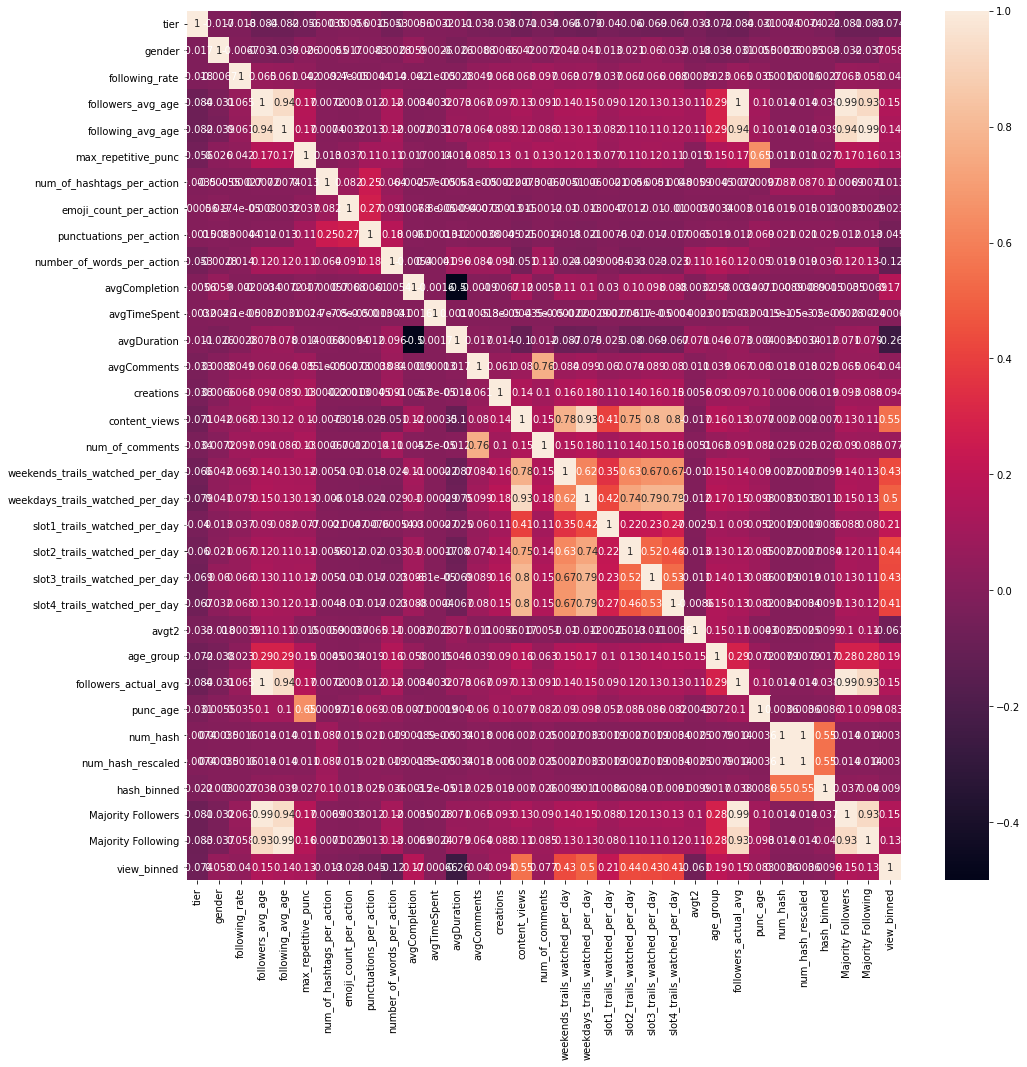

In [31]:
plt.figure(figsize = (16,16))
sns.heatmap(train.drop(['Unnamed: 0', 'userId'], axis = 1).corr(), annot = True)
plt.show()

In [32]:
X = train.drop(['age_group'], axis = 1)
Y = train['age_group']

In [33]:
from sklearn.model_selection import train_test_split
X_Train, X_CV, Y_Train, Y_CV = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [36]:
class_weights = {1:1, 2:5, 3:5, 4:5}
clf = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.17, n_jobs=-1, reg_lambda=1,
                         is_unbalanced = True, objective = 'multiclassova')
clf.fit(X_Train, Y_Train, early_stopping_rounds = 200, eval_set = [(X_Train, Y_Train), (X_CV, Y_CV)], verbose = True)

[1]	training's multi_logloss: 0.883897	valid_1's multi_logloss: 0.880481
Training until validation scores don't improve for 200 rounds.
[2]	training's multi_logloss: 0.787945	valid_1's multi_logloss: 0.784654
[3]	training's multi_logloss: 0.721471	valid_1's multi_logloss: 0.718261
[4]	training's multi_logloss: 0.672409	valid_1's multi_logloss: 0.669274
[5]	training's multi_logloss: 0.634793	valid_1's multi_logloss: 0.631679
[6]	training's multi_logloss: 0.605607	valid_1's multi_logloss: 0.602632
[7]	training's multi_logloss: 0.582412	valid_1's multi_logloss: 0.579603
[8]	training's multi_logloss: 0.563942	valid_1's multi_logloss: 0.561326
[9]	training's multi_logloss: 0.548965	valid_1's multi_logloss: 0.546499
[10]	training's multi_logloss: 0.536708	valid_1's multi_logloss: 0.534318
[11]	training's multi_logloss: 0.526536	valid_1's multi_logloss: 0.524253
[12]	training's multi_logloss: 0.518333	valid_1's multi_logloss: 0.51616
[13]	training's multi_logloss: 0.511594	valid_1's multi_log

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalanced=True, learning_rate=0.17,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective='multiclassova', random_state=None, reg_alpha=0.0,
               reg_lambda=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [37]:
pred = clf.predict(X_CV)
print(f1_score(Y_CV, pred, average = 'weighted'))

0.7717343411569362


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=3000,
                    learning_rate=0.2, n_jobs=-1, objective = 'multiclassova')
xgb.fit(X_Train, Y_Train, early_stopping_rounds = 200, eval_set = [(X_Train, Y_Train), (X_CV, Y_CV)],eval_metric = 'mlogloss', verbose = True)

[0]	validation_0-mlogloss:1.17528	validation_1-mlogloss:1.1747
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 200 rounds.
[1]	validation_0-mlogloss:1.04027	validation_1-mlogloss:1.03746
[2]	validation_0-mlogloss:0.939655	validation_1-mlogloss:0.937447
[3]	validation_0-mlogloss:0.868147	validation_1-mlogloss:0.86508
[4]	validation_0-mlogloss:0.807026	validation_1-mlogloss:0.803629
[5]	validation_0-mlogloss:0.760063	validation_1-mlogloss:0.75601
[6]	validation_0-mlogloss:0.720402	validation_1-mlogloss:0.717015
[7]	validation_0-mlogloss:0.689366	validation_1-mlogloss:0.685448
[8]	validation_0-mlogloss:0.664401	validation_1-mlogloss:0.660958
[9]	validation_0-mlogloss:0.642608	validation_1-mlogloss:0.638871
[10]	validation_0-mlogloss:0.626136	validation_1-mlogloss:0.621917
[11]	validation_0-mlogloss:0.610665	validation_1-mlogloss:0.607104
[12]	validation_0-mlogloss:0.596192	validatio

In [ ]:
pred = xgb.predict(X_CV)
print(f1_score(Y_CV, pred, average = 'weighted'))

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
class_weights = {1:1, 2:5, 3:5, 4:5}
cat = CatBoostClassifier(iterations = 1000, learning_rate = 0.25, class_weights = class_weights)
cat.fit(X_Train, Y_Train, use_best_model = True, eval_set = [(X_CV, Y_CV)], verbose = True)

0:	learn: 1.2031330	test: 1.2021733	best: 1.2021733 (0)	total: 474ms	remaining: 7m 53s
1:	learn: 1.1207165	test: 1.1193675	best: 1.1193675 (1)	total: 955ms	remaining: 7m 56s
2:	learn: 1.0560412	test: 1.0538180	best: 1.0538180 (2)	total: 1.47s	remaining: 8m 9s
3:	learn: 1.0219576	test: 1.0200972	best: 1.0200972 (3)	total: 1.94s	remaining: 8m 2s
4:	learn: 0.9982376	test: 0.9964372	best: 0.9964372 (4)	total: 2.38s	remaining: 7m 53s
5:	learn: 0.9787666	test: 0.9769439	best: 0.9769439 (5)	total: 2.88s	remaining: 7m 56s
6:	learn: 0.9599938	test: 0.9580036	best: 0.9580036 (6)	total: 3.4s	remaining: 8m 2s
7:	learn: 0.9506957	test: 0.9489280	best: 0.9489280 (7)	total: 3.83s	remaining: 7m 54s
8:	learn: 0.9433911	test: 0.9417777	best: 0.9417777 (8)	total: 4.28s	remaining: 7m 51s
9:	learn: 0.9312962	test: 0.9294064	best: 0.9294064 (9)	total: 4.79s	remaining: 7m 53s
10:	learn: 0.9220944	test: 0.9200736	best: 0.9200736 (10)	total: 5.3s	remaining: 7m 56s
11:	learn: 0.9183602	test: 0.9164096	best: 0.9

KeyboardInterrupt: ignored

In [ ]:
pred = cat.predict(X_CV)
print(f1_score(Y_CV, pred, average = 'weighted'))

CatBoostError: ignored

In [40]:
#lgb_pred = clf.predict_proba(test.drop(['age_group', 'Majority Followers', 'Majority Following', 'view_binned'], axis = 1))
xgb_pred = xgb.predict_proba(test.drop(['age_group'], axis = 1))
#ensemble = (0.77*lgb_pred + 0.7997*xgb_pred)/(0.77 + 0.7997)
test_pred = pd.DataFrame(xgb_pred)
test_pred = test_pred.idxmax(axis = 1) + 1
test_pred.columns = ['prediction']

In [41]:
test_pred.head()

0    1
1    1
2    1
3    2
4    1
dtype: int64

In [42]:
test_pred.to_csv('/content/drive/MyDrive/Datasets/Data/Preds/Submission11.csv', index = False, header = True)